# Project Team: JSS
**Code Jupyter Notebook Submission**

*ECEN 758 Project - Fall 2023*

**Team Members:**
*   Janvita Reddy Peddagudreddygari (634005984)
*   Sidharth Thazhathedathu (427009745)
*   Satya Prakash Kodamanchili (733000499)

**Reader Guidelines:**

1. This code is designed to fetch data from the web, eliminating the need for input files.
2. Optimize performance by running this Notebook on Google Colab with T4 GPU Runtime for faster results.
3. The pivotal Final Model is located in the 4. Final Model section. For a quicker overview, run only up to that section.






In [1]:
# Importing all the necessary packages
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
import cv2

from matplotlib.ticker import MaxNLocator

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Lambda, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# displaying warning
warnings.warn('ignore')

<ipython-input-1-a68b9c94e32e>:35: UserWarning: ignore
  warnings.warn('ignore')


In [2]:
# Importing the Fashion MNIST Data directly from the Tensorflow Datasets
fashion = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion.load_data()

##1. Data Preparation

###1(a). Data Cleaning and Transformation
Checking Data Sanity and cleaning. The sanitized data is then transformed for enhanced model training and accuracy.

In [3]:
# Checking the number of null values in the dataset
missing_values_Xtrain = np.isnan(X_train).sum()
missing_values_Ytrain = np.isnan(X_test).sum()
missing_values_Xtest = np.isnan(X_train).sum()
missing_values_Ytest = np.isnan(X_test).sum()
print(f'There are {missing_values_Xtrain+missing_values_Ytrain+missing_values_Xtest+missing_values_Ytest} missing values in the dataset')

There are 0 missing values in the dataset


MNIST is a clean dataset with no missing values.
Since MNIST consists of pixel values, there are no real outliers.

In [4]:
label_map = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress",
             4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag",
             9: "Ankle boot"}
print("The Labels are coded like this:", label_map)

The Labels are coded like this: {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [5]:
X_train_scale = X_train.reshape(-1, 28 * 28) / 255.0
X_test_scale = X_test.reshape(-1, 28 * 28) / 255.0

The code provided reshapes the three-dimensional training and test image datasets, `X_train` and `X_test`, into two-dimensional arrays, where each 28 by 28 pixel image is flattened into a single row of 784 pixels. Simultaneously, it normalizes the pixel values dividing by 255, converting them from integers in the range of 0 to 255 to floating-point numbers between 0 and 1. This preprocessing step, commonly applied in machine learning, facilitates a faster convergence during training and ensures that the scale of the pixel intensities doesn't disproportionately influence the model's learning process, thereby often leading to improved performance.

We already have 60000 training dataset and 10000 testing dataset. The train dataset is further split into train and validation dataset in the later stages where it is required. For few Machine Learning models, k-Fold cross validation is performed instead of separating a validation dataset.

##2. Exploratory Data Analysis
Unveiling Patterns and Insights by exploring the dataset manually without fitting any Machine Learning Models.

###2(a). Descriptive Statistics
Leveraging Descriptive Statistics for a Quantitative Snapshot of the Fashion MNIST Dataset.

In [6]:
unique_lablels, unique_count = np.unique(Y_train, return_counts=True)
for i in range(10):
  print(f'There are {unique_count[i]} images of {label_map[i]} in dataset' )

There are 6000 images of T-shirt/top in dataset
There are 6000 images of Trouser in dataset
There are 6000 images of Pullover in dataset
There are 6000 images of Dress in dataset
There are 6000 images of Coat in dataset
There are 6000 images of Sandal in dataset
There are 6000 images of Shirt in dataset
There are 6000 images of Sneaker in dataset
There are 6000 images of Bag in dataset
There are 6000 images of Ankle boot in dataset


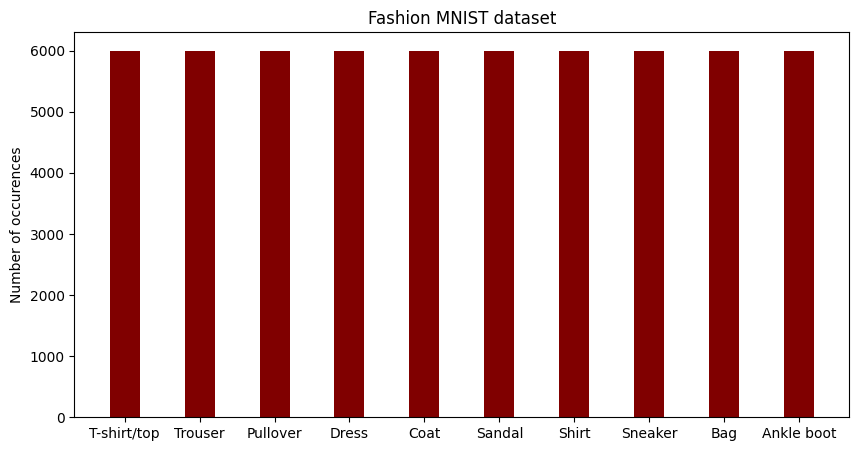

In [7]:
class_labels = list(label_map.values())
values = list(i for i in unique_count)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(class_labels, values,
        width = 0.4, color = 'maroon')

plt.xlabel("")
plt.ylabel("Number of occurences")
plt.title("Fashion MNIST dataset")
plt.show()


In [8]:
print("Training Set Statistics:")
print("Number of Samples:", X_train.shape[0])
print("Number of Features (Pixels):", X_train.shape[1] * X_train.shape[2])
print("Data Type:", X_train.dtype)
print("Minimum Pixel Value:", np.min(X_train))
print("Maximum Pixel Value:", np.max(X_train))
print("Mean Pixel Value:", np.mean(X_train))
print("Standard Deviation:", np.std(X_train))

Training Set Statistics:
Number of Samples: 60000
Number of Features (Pixels): 784
Data Type: uint8
Minimum Pixel Value: 0
Maximum Pixel Value: 255
Mean Pixel Value: 72.94035223214286
Standard Deviation: 90.02118235130519


The Fashion MNIST Dataset is a well-balanced dataset with all the categories having 6000 samples each.

###2(b). Data Visualisation
Employing Engaging Visualizations to Decode Complex Patterns in the Fashion MNIST Dataset.

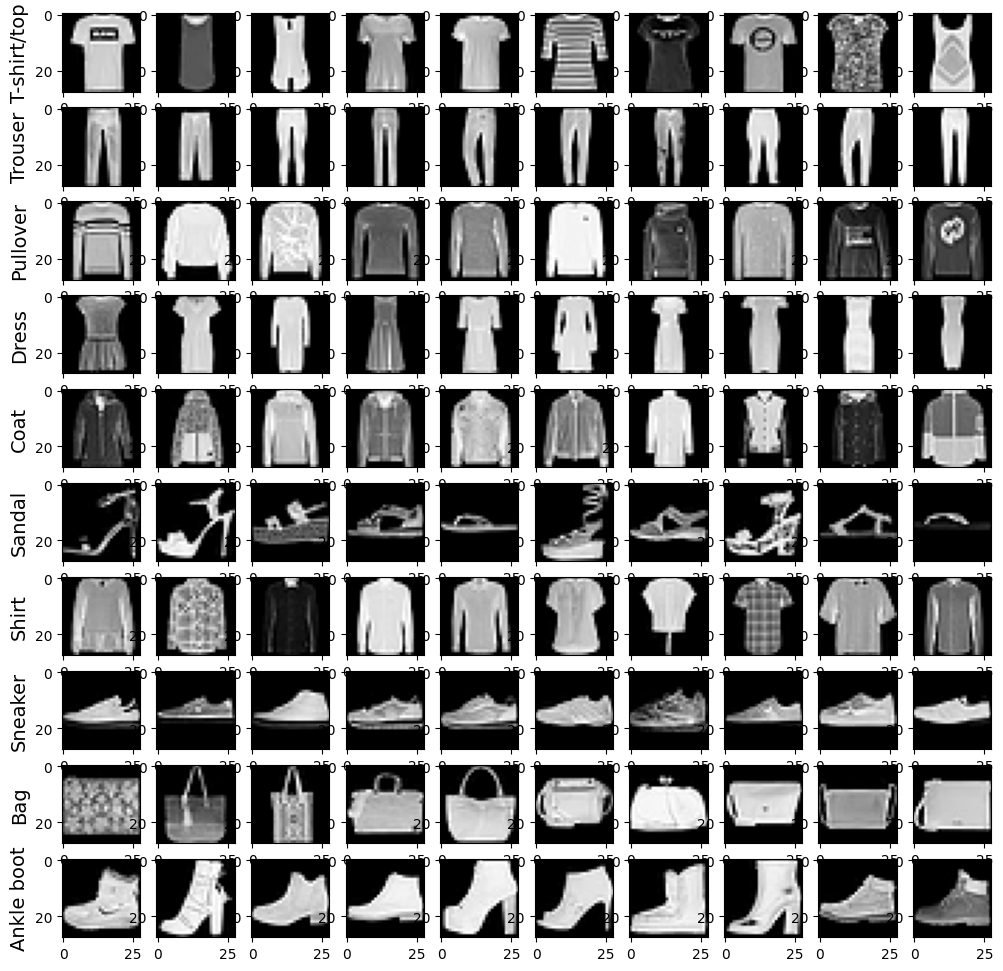

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(10, 10, figsize=(12, 12))
for i in range(10):
  for j in range(10):
    axes[i, j].imshow(X_train[Y_train == i][j], cmap = 'gray', vmin=0, vmax=255)

for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(class_names[i], fontsize=14)

The above plot shows images of the first 10 items in each category.

##3. Final Model
The final model is chosen after testing different models and optimizing their hyperparameters. You can view the results by running this section for easy access and evaluation.

In [10]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)
train_X,val_X,train_y,val_y = train_test_split(train_images,train_labels,test_size = 0.2)# Splitting into train and validation data

In [11]:
def final_model():

  model = Sequential()
  model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))
  model.add(layers.Lambda(tf.nn.local_response_normalization))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(3, strides=2))
  model.add(layers.Conv2D(16*(2), 3 , padding='same' ))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(16*(3), 3 , padding='same' ))
  model.add(layers.Activation('relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  return model

model = final_model()
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X,train_y, batch_size=30, epochs=1,validation_data = (val_X,val_y))

1600/1600 [==============================] - 20s 10ms/step - loss: 0.5004 - accuracy: 0.8116 - val_loss: 0.3439 - val_accuracy: 0.8710


In [12]:
'''model.save("/content/model.h5")'''

'model.save("/content/model.h5")'

In [64]:
model = tf.keras.models.load_model("/content/model(1).h5")

###Model Evaluation

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Final Model Test Accuracy:", test_acc)
print("Final Model Test Loss:", test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.2633 - accuracy: 0.9153
Final Model Test Accuracy: 0.9153000116348267
Final Model Test Loss: 0.2633167505264282


313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.88      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.84      0.89      0.86      1000
       Dress       0.91      0.94      0.92      1000
        Coat       0.87      0.84      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.78      0.73      0.76      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.92      0.91     10000



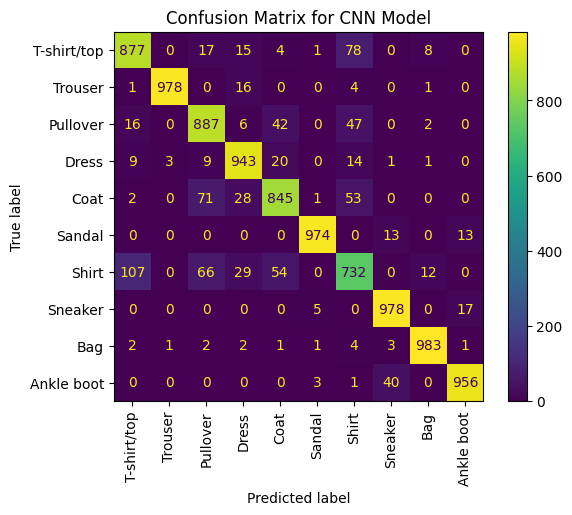

In [15]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred,axis = 1)
test_labels = np.argmax(np.array(test_labels),axis = 1)


print(classification_report(test_labels,y_pred, target_names=class_names))
cm = confusion_matrix(test_labels, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot( values_format='d')
plt.title('Confusion Matrix for CNN Model')
plt.xticks(rotation='vertical')
plt.show()

##4. Addressing Model Interpretability

###4.1 Feature Maps

In [16]:

'''
layer_name = 'conv2d_9'  # Choose the layer  to visualize
selected_layer = model.get_layer(layer_name)

# Create a new model for visualization
feature_map_model = keras.Model(inputs=model.input, outputs=selected_layer.output)

img = np.expand_dims(test_images[0], axis=0)


# Get the feature maps
feature_maps = feature_map_model.predict(img)

# Plot the feature maps
plt.figure(figsize=(8, 8))
for i in range(feature_maps.shape[-1]):
    plt.subplot(8, 8, i + 1)  # Adjust the subplot grid as needed
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')  # Change the colormap as needed
    plt.axis('off')
plt.show()'''

"\nlayer_name = 'conv2d_9'  # Choose the layer  to visualize\nselected_layer = model.get_layer(layer_name)\n\n# Create a new model for visualization\nfeature_map_model = keras.Model(inputs=model.input, outputs=selected_layer.output)\n\nimg = np.expand_dims(test_images[0], axis=0)\n \n\n# Get the feature maps\nfeature_maps = feature_map_model.predict(img)\n\n# Plot the feature maps\nplt.figure(figsize=(8, 8))\nfor i in range(feature_maps.shape[-1]):\n    plt.subplot(8, 8, i + 1)  # Adjust the subplot grid as needed\n    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')  # Change the colormap as needed\n    plt.axis('off')\nplt.show()"

###4.2 Heat Maps

In [17]:
'''def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()'''

'def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):\n    # First, we create a model that maps the input image to the activations\n    # of the last conv layer as well as the output predictions\n    grad_model = keras.models.Model(\n        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]\n    )\n\n    # Then, we compute the gradient of the top predicted class for our input image\n    # with respect to the activations of the last conv layer\n    with tf.GradientTape() as tape:\n        last_conv_layer_output, preds = grad_model(img_array)\n        if pred_index is None:\n            pred_index = tf.argmax(preds[0])\n        class_channel = preds[:, pred_index]\n\n    # This is the gradient of the output neuron (top predicted or chosen)\n    # with regard to the output feature map of the last conv layer\n    grads = tape.gradient(class_channel, last_conv_layer_output)\n\n    # This is a vector where each entry is the mean intensit

In [18]:
'''(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255'''

'(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()\ntrain_images = train_images.reshape((60000, 28, 28, 1))\ntrain_images = train_images.astype("float32") / 255\ntest_images = test_images.reshape((10000, 28, 28, 1))\ntest_images = test_images.astype("float32") / 255'

In [19]:

'''class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(10, 10, figsize=(12, 12))
for i in range(10):
  for j in range(10):
    #axes[i, j].imshow(X_train[Y_train == i][j], cmap = 'gray', vmin=0, vmax=255)
    img_array = np.expand_dims(test_images[test_labels == i][j], axis=0)
    heatmap = make_gradcam_heatmap(img_array, model, 'conv2d_9')
    axes[i, j].matshow(heatmap)
    axes[i, j].axis('off')
    #plt.show()

for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(class_names[i], fontsize=10)'''

"class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']\n\nfig, axes = plt.subplots(10, 10, figsize=(12, 12))\nfor i in range(10):\n  for j in range(10):\n    #axes[i, j].imshow(X_train[Y_train == i][j], cmap = 'gray', vmin=0, vmax=255)\n    img_array = np.expand_dims(test_images[test_labels == i][j], axis=0)\n    heatmap = make_gradcam_heatmap(img_array, model, 'conv2d_9')\n    axes[i, j].matshow(heatmap)\n    axes[i, j].axis('off')\n    #plt.show()\n\nfor i, ax in enumerate(axes[:, 0]):\n    ax.set_ylabel(class_names[i], fontsize=10)"

##5. Principle Component Analysis
By applying Principal Component Analysis (PCA) to the Fashion MNIST dataset, we've effectively distilled the high-dimensional image data into a concise, informative subset of features. This dimensionality reduction allows us to visualize and interpret the underlying structure of the data more clearly, while also accelerating the training process of machine learning algorithms. Through PCA, we've captured the most significant variations among the fashion items with fewer variables, enabling more efficient data processing and potentially uncovering subtle patterns that might not be apparent in the full 784-dimensional space.

In [20]:
'''n_components = 225  # (225 dimensions)
pca = PCA(n_components=n_components)
pca.fit(X_train_scale)'''

'n_components = 225  # (225 dimensions)\npca = PCA(n_components=n_components)\npca.fit(X_train_scale)'

In [21]:
'''plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Number of Components',fontsize = 15)
plt.ylabel('Cumulative Explained Variance',fontsize = 15)
plt.grid()
plt.show()'''

"plt.figure(figsize=(8, 6))\nplt.plot(np.cumsum(pca.explained_variance_ratio_))\nplt.xticks(fontsize=15)\nplt.xticks(fontsize=15)\nplt.xlabel('Number of Components',fontsize = 15)\nplt.ylabel('Cumulative Explained Variance',fontsize = 15)\nplt.grid()\nplt.show()"

We observe from the plot that just with minimum 144 dimensions, we can capture more than 90% of variance.

In [22]:
'''train_pca = pca.transform(X_train_scale)
test_pca = pca.transform(X_test_scale)'''

'train_pca = pca.transform(X_train_scale)\ntest_pca = pca.transform(X_test_scale)'

In [23]:
'''reconstructed_images = pca.inverse_transform(train_pca)
reconstructed_images = reconstructed_images.reshape(-1, 28, 28)
reconstructed_images = reconstructed_images*255'''

'reconstructed_images = pca.inverse_transform(train_pca)\nreconstructed_images = reconstructed_images.reshape(-1, 28, 28)\nreconstructed_images = reconstructed_images*255'

In [24]:
'''class_names=['top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']'''

"class_names=['top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']"

In [25]:

'''fig, axes = plt.subplots(10, 10, figsize=(12,12))
for i in range(10):
  for j in range(10):
    axes[i, j].imshow(reconstructed_images[Y_train == i][j], cmap = 'gray', vmin=0, vmax=255)

for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(class_names[i], fontsize=14)'''

"fig, axes = plt.subplots(10, 10, figsize=(12,12))\nfor i in range(10):\n  for j in range(10):\n    axes[i, j].imshow(reconstructed_images[Y_train == i][j], cmap = 'gray', vmin=0, vmax=255)\n\nfor i, ax in enumerate(axes[:, 0]):\n    ax.set_ylabel(class_names[i], fontsize=14)"

From the above plot, we observe that most of data information is retained with the reduced dimensions from PCA.

##6. Model Selection
During the model selection phase, we systematically trained and fine-tuned various algorithms, meticulously optimizing their hyperparameters. This rigorous approach allowed us to compare their performances objectively, ultimately guiding us to identify the single most effective model for our Fashion MNIST dataset analysis.

###6.1. SVM
Support Vector Machines

SVC hyperparamater tuning

In [26]:
'''model3 = SVC()
param_grid = {
    'C': [ 1, 10],  # Regularization parameter
    'kernel': ['poly', 'rbf'],  # Kernel type
    'gamma': ['auto'],  # Kernel coefficient
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Create a grid search using cross-validation
grid_search = GridSearchCV(model3, param_grid, cv=cv,verbose=3)

# Fit the grid search to your data
grid_search.fit(X_train_scale, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_'''

"model3 = SVC()\nparam_grid = {\n    'C': [ 1, 10],  # Regularization parameter\n    'kernel': ['poly', 'rbf'],  # Kernel type\n    'gamma': ['auto'],  # Kernel coefficient\n}\n\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)\n\n# Create a grid search using cross-validation\ngrid_search = GridSearchCV(model3, param_grid, cv=cv,verbose=3)\n\n# Fit the grid search to your data\ngrid_search.fit(X_train_scale, Y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_"

In [27]:
'''print("Best Hyperparameters:", best_params)'''

'print("Best Hyperparameters:", best_params)'

SVC

In [28]:
'''svc = SVC(**best_params)
svc.fit(X_train_scale, Y_train)
svc_pred = svc.predict(X_test_scale)
acc = svc.score(X_test_scale,Y_test)
print(f'The score for SVM is {acc}')
cm=multilabel_confusion_matrix(Y_test,svc_pred)
y_pred = svc.predict(X_test_scale)

print(classification_report(Y_test, svc_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    svc, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : SVC')
plt.tight_layout()
plt.show()'''

'svc = SVC(**best_params)\nsvc.fit(X_train_scale, Y_train)\nsvc_pred = svc.predict(X_test_scale)\nacc = svc.score(X_test_scale,Y_test)\nprint(f\'The score for SVM is {acc}\')\ncm=multilabel_confusion_matrix(Y_test,svc_pred)\ny_pred = svc.predict(X_test_scale)\n\nprint(classification_report(Y_test, svc_pred, target_names=class_names))\nConfusionMatrixDisplay.from_estimator(\n    svc, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"\n)\nplt.title(\'Confusion matrix : SVC\')\nplt.tight_layout()\nplt.show()'

SVM with PCA

In [29]:
'''model3 = SVC()
param_grid = {
    'C': [ 1, 10],  # Regularization parameter
    'kernel': ['poly', 'rbf'],  # Kernel type
    'gamma': ['auto'],  # Kernel coefficient
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Create a grid search using cross-validation
grid_search = GridSearchCV(model3, param_grid, cv=cv,verbose=3)

# Fit the grid search to your data
grid_search.fit(train_pca, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

model3=SVC(**best_params)
model3.fit(train_pca,Y_train)
print(f'SVC with PCA score:{model3.score(test_pca,Y_test)}')
svc_pred=model3.predict(test_pca)
cm=multilabel_confusion_matrix(Y_test,svc_pred)
print(classification_report(Y_test, svc_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    model3, test_pca,Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : SVC (PCA)')
plt.tight_layout()
plt.show()'''

'model3 = SVC()\nparam_grid = {\n    \'C\': [ 1, 10],  # Regularization parameter\n    \'kernel\': [\'poly\', \'rbf\'],  # Kernel type\n    \'gamma\': [\'auto\'],  # Kernel coefficient\n}\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)\n\n# Create a grid search using cross-validation\ngrid_search = GridSearchCV(model3, param_grid, cv=cv,verbose=3)\n\n# Fit the grid search to your data\ngrid_search.fit(train_pca, Y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\nprint("Best Hyperparameters:", best_params)\n\nmodel3=SVC(**best_params)\nmodel3.fit(train_pca,Y_train)\nprint(f\'SVC with PCA score:{model3.score(test_pca,Y_test)}\')\nsvc_pred=model3.predict(test_pca)\ncm=multilabel_confusion_matrix(Y_test,svc_pred)\nprint(classification_report(Y_test, svc_pred, target_names=class_names))\nConfusionMatrixDisplay.from_estimator(\n    model3, test_pca,Y_test, display_labels=class_names, xticks_rotation="vertical"\n)\nplt.title(\'Confusion matrix 

###6.2. Random Forest

Random Forest Hyperparamter tuning

In [30]:
'''#Random Forest
rf=RandomForestClassifier()
params_rf={'n_estimators':[50,100],
    'criterion':['entropy'],
    'min_samples_split':[2],
    'max_samples': [None],
     'max_depth':[100]
    }
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_rf=GridSearchCV(rf,params_rf,cv=cv,verbose=3)

grid_rf.fit(X_train_scale,Y_train)'''

"#Random Forest\nrf=RandomForestClassifier()\nparams_rf={'n_estimators':[50,100],\n    'criterion':['entropy'],\n    'min_samples_split':[2],\n    'max_samples': [None],\n     'max_depth':[100]\n    }\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)\n\ngrid_rf=GridSearchCV(rf,params_rf,cv=cv,verbose=3)\n\ngrid_rf.fit(X_train_scale,Y_train)"

In [31]:
'''best_params = grid_rf.best_params_
print("best paramters random forest: ",grid_rf.best_params_)'''

'best_params = grid_rf.best_params_\nprint("best paramters random forest: ",grid_rf.best_params_)'

RandomForest Classifier

In [32]:
'''rf=RandomForestClassifier(**best_params)
rf.fit(X_train_scale,Y_train)
print(f'RandomForest score: {rf.score(X_test_scale,Y_test)}')
y_pred_rf=rf.predict(X_test_scale)
cm=multilabel_confusion_matrix(Y_test,y_pred_rf)
y_pred = rf.predict(X_test_scale)

print(classification_report(Y_test, y_pred_rf, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    rf, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : RandomForest')
plt.tight_layout()
plt.show()'''

'rf=RandomForestClassifier(**best_params)\nrf.fit(X_train_scale,Y_train)\nprint(f\'RandomForest score: {rf.score(X_test_scale,Y_test)}\')\ny_pred_rf=rf.predict(X_test_scale)\ncm=multilabel_confusion_matrix(Y_test,y_pred_rf)\ny_pred = rf.predict(X_test_scale)\n\nprint(classification_report(Y_test, y_pred_rf, target_names=class_names))\nConfusionMatrixDisplay.from_estimator(\n    rf, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"\n)\nplt.title(\'Confusion matrix : RandomForest\')\nplt.tight_layout()\nplt.show()'

RandomForest with PCA

In [33]:
'''#Random Forest
rf=RandomForestClassifier()
params_rf={'n_estimators':[50,100],
    'criterion':['entropy'],
    'min_samples_split':[2],
    'max_samples': [None],
     'max_depth':[100]
    }
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_rf=GridSearchCV(rf,params_rf,cv=cv,verbose=3)

grid_rf.fit(train_pca,Y_train)'''

"#Random Forest\nrf=RandomForestClassifier()\nparams_rf={'n_estimators':[50,100],\n    'criterion':['entropy'],\n    'min_samples_split':[2],\n    'max_samples': [None],\n     'max_depth':[100]\n    }\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)\n\ngrid_rf=GridSearchCV(rf,params_rf,cv=cv,verbose=3)\n\ngrid_rf.fit(train_pca,Y_train)"

In [34]:
'''best_params = grid_rf.best_params_'''

'best_params = grid_rf.best_params_'

In [35]:
'''rf=RandomForestClassifier(**best_params)
rf.fit(train_pca,Y_train)
print(f'RandomForest score with pca: {rf.score(test_pca,Y_test)}')
y_pred_rf=rf.predict(test_pca)
cm=multilabel_confusion_matrix(Y_test,y_pred_rf)

print(classification_report(Y_test, y_pred_rf, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    rf, test_pca, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : RandomForest (PCA)')
plt.tight_layout()
plt.show()'''

'rf=RandomForestClassifier(**best_params)\nrf.fit(train_pca,Y_train)\nprint(f\'RandomForest score with pca: {rf.score(test_pca,Y_test)}\')\ny_pred_rf=rf.predict(test_pca)\ncm=multilabel_confusion_matrix(Y_test,y_pred_rf)\n\nprint(classification_report(Y_test, y_pred_rf, target_names=class_names))\nConfusionMatrixDisplay.from_estimator(\n    rf, test_pca, Y_test, display_labels=class_names, xticks_rotation="vertical"\n)\nplt.title(\'Confusion matrix : RandomForest (PCA)\')\nplt.tight_layout()\nplt.show()'

###6.3. K Nearest Neighbours (KNN)

KNN Hyperparameter Tuning

In [36]:
'''#knn
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5,9],
    'weights': ['distance','uniform'],
    'p': [1, 2]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(knn, param_grid, cv=cv,verbose=3)

grid_search.fit(X_train_scale, Y_train)'''

"#knn\nknn = KNeighborsClassifier()\n\nparam_grid = {\n    'n_neighbors': [5,9],\n    'weights': ['distance','uniform'],\n    'p': [1, 2]\n}\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)\n\ngrid_search = GridSearchCV(knn, param_grid, cv=cv,verbose=3)\n\ngrid_search.fit(X_train_scale, Y_train)"

In [37]:
'''print("Best parameters: ", grid_search.best_params_)'''

'print("Best parameters: ", grid_search.best_params_)'

KNN Classifier

In [38]:
'''neigh=KNeighborsClassifier()
neigh.fit(X_train_scale,Y_train)
print(f'KNN score :{neigh.score(X_test_scale,Y_test)}')
y_pred = neigh.predict(X_test_scale)

print(classification_report(Y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    neigh, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : KNN')
plt.tight_layout()
plt.show()'''

'neigh=KNeighborsClassifier()\nneigh.fit(X_train_scale,Y_train)\nprint(f\'KNN score :{neigh.score(X_test_scale,Y_test)}\')\ny_pred = neigh.predict(X_test_scale)\n\nprint(classification_report(Y_test, y_pred, target_names=class_names))\nConfusionMatrixDisplay.from_estimator(\n    neigh, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"\n)\nplt.title(\'Confusion matrix : KNN\')\nplt.tight_layout()\nplt.show()'

KNN with PCA

In [39]:
'''knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5,9],
    'weights': ['distance','uniform'],
    'p': [1, 2]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(knn, param_grid, cv=cv,verbose=3)

grid_search.fit(train_pca, Y_train)


print("Best parameters: ", grid_search.best_params_)
best_params=grid_search.best_params_

neigh=KNeighborsClassifier(**best_params)
neigh.fit(train_pca,Y_train)
print(f'KNN score with pca:{neigh.score(test_pca,Y_test)}')
y_pred = neigh.predict(test_pca)

print(classification_report(Y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    neigh, test_pca, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : KNN (PCA)')
plt.tight_layout()
plt.show()'''

'knn = KNeighborsClassifier()\n\nparam_grid = {\n    \'n_neighbors\': [5,9],\n    \'weights\': [\'distance\',\'uniform\'],\n    \'p\': [1, 2]\n}\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)\n\ngrid_search = GridSearchCV(knn, param_grid, cv=cv,verbose=3)\n\ngrid_search.fit(train_pca, Y_train)\n\n\nprint("Best parameters: ", grid_search.best_params_)\nbest_params=grid_search.best_params_\n\nneigh=KNeighborsClassifier(**best_params)\nneigh.fit(train_pca,Y_train)\nprint(f\'KNN score with pca:{neigh.score(test_pca,Y_test)}\')\ny_pred = neigh.predict(test_pca)\n\nprint(classification_report(Y_test, y_pred, target_names=class_names))\nConfusionMatrixDisplay.from_estimator(\n    neigh, test_pca, Y_test, display_labels=class_names, xticks_rotation="vertical"\n)\nplt.title(\'Confusion matrix : KNN (PCA)\')\nplt.tight_layout()\nplt.show()'

###6.4. NaiveBayes Classifier Model

NaiveBayes Classifier

In [40]:
'''gnb = GaussianNB()
param_grid = {
    'var_smoothing':np.logspace(0,-9, num=10)
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(gnb, param_grid, cv=cv,verbose=3)

grid_search.fit(X_train_scale, Y_train)


print("Best parameters: ", grid_search.best_params_)
best_params=grid_search.best_params_
gnb= GaussianNB(**best_params)
gnb.fit(X_train_scale,Y_train)
print(f'NB score:{gnb.score(X_test_scale,Y_test)}')
gnb_pred = gnb.predict(X_test_scale)

print(classification_report(Y_test, gnb_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    gnb, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : NaiveBayes')
plt.tight_layout()
plt.show()'''


'gnb = GaussianNB()\nparam_grid = {\n    \'var_smoothing\':np.logspace(0,-9, num=10)\n}\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)\n\ngrid_search = GridSearchCV(gnb, param_grid, cv=cv,verbose=3)\n\ngrid_search.fit(X_train_scale, Y_train)\n\n\nprint("Best parameters: ", grid_search.best_params_)\nbest_params=grid_search.best_params_\ngnb= GaussianNB(**best_params)\ngnb.fit(X_train_scale,Y_train)\nprint(f\'NB score:{gnb.score(X_test_scale,Y_test)}\')\ngnb_pred = gnb.predict(X_test_scale)\n\nprint(classification_report(Y_test, gnb_pred, target_names=class_names))\nConfusionMatrixDisplay.from_estimator(\n    gnb, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"\n)\nplt.title(\'Confusion matrix : NaiveBayes\')\nplt.tight_layout()\nplt.show()'

NaiveBayes with PCA

In [41]:
'''gnb = GaussianNB()
param_grid = {
    'var_smoothing':np.logspace(0,-9, num=10)
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(gnb, param_grid, cv=cv,verbose=3)

grid_search.fit(train_pca, Y_train)


print("Best parameters: ", grid_search.best_params_)
best_params=grid_search.best_params_
gnb= GaussianNB(**best_params)
gnb.fit(train_pca,Y_train)
print(f'NB score:{gnb.score(test_pca,Y_test)}')
gnb_pred = gnb.predict(test_pca)

print(classification_report(Y_test, gnb_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    gnb, test_pca, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : NaiveBayes (PCA)')
plt.tight_layout()
plt.show()'''

'gnb = GaussianNB()\nparam_grid = {\n    \'var_smoothing\':np.logspace(0,-9, num=10)\n}\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)\n\ngrid_search = GridSearchCV(gnb, param_grid, cv=cv,verbose=3)\n\ngrid_search.fit(train_pca, Y_train)\n\n\nprint("Best parameters: ", grid_search.best_params_)\nbest_params=grid_search.best_params_\ngnb= GaussianNB(**best_params)\ngnb.fit(train_pca,Y_train)\nprint(f\'NB score:{gnb.score(test_pca,Y_test)}\')\ngnb_pred = gnb.predict(test_pca)\n\nprint(classification_report(Y_test, gnb_pred, target_names=class_names))\nConfusionMatrixDisplay.from_estimator(\n    gnb, test_pca, Y_test, display_labels=class_names, xticks_rotation="vertical"\n)\nplt.title(\'Confusion matrix : NaiveBayes (PCA)\')\nplt.tight_layout()\nplt.show()'

###6.5. Convolutional Neural Networks (CNN)

In [42]:
'''(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)
train_X,val_X,train_y,val_y = train_test_split(train_images,train_labels,test_size = 0.2)'''

'(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()\ntrain_images = train_images.reshape((60000, 28, 28, 1))\ntrain_images = train_images.astype("float32") / 255\ntest_images = test_images.reshape((10000, 28, 28, 1))\ntest_images = test_images.astype("float32") / 255\ntrain_labels = pd.get_dummies(train_labels)\ntest_labels = pd.get_dummies(test_labels)\ntrain_X,val_X,train_y,val_y = train_test_split(train_images,train_labels,test_size = 0.2)'

**Hyper-Parameter Tuning**

####6.5.1. Hyper-Parameter Tuning: Changing number of layers

In [43]:
'''def create_model (filter_layers,activation):
  model = Sequential()
  for i in range(filter_layers):
    if i ==0:
      model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))
      model.add(layers.Lambda(tf.nn.local_response_normalization))
      model.add(layers.Activation(activation))
      model.add(layers.MaxPooling2D(3, strides=2))
    else:
      model.add(layers.Conv2D(16*(i+1), 3 , padding='same' ))
      #model.add(layers.Lambda(tf.nn.local_response_normalization))
      model.add(layers.Activation(activation))
      #model.add(layers.MaxPooling2D(3, strides=2))


  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation=activation))
  #model.add(layers.Dropout(0.5))
  model.add(layers.Dense(64, activation=activation))
  #model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer = 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])
  return model'''

"def create_model (filter_layers,activation):\n  model = Sequential()\n  for i in range(filter_layers):\n    if i ==0:\n      model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))\n      model.add(layers.Lambda(tf.nn.local_response_normalization))\n      model.add(layers.Activation(activation))\n      model.add(layers.MaxPooling2D(3, strides=2))\n    else:\n      model.add(layers.Conv2D(16*(i+1), 3 , padding='same' ))\n      #model.add(layers.Lambda(tf.nn.local_response_normalization))\n      model.add(layers.Activation(activation))\n      #model.add(layers.MaxPooling2D(3, strides=2))\n\n\n  model.add(layers.Flatten())\n  model.add(layers.Dense(400, activation=activation))\n  #model.add(layers.Dropout(0.5))\n  model.add(layers.Dense(64, activation=activation))\n  #model.add(layers.Dropout(0.5))\n  model.add(layers.Dense(10, activation='softmax'))\n\n  model.compile(optimizer = 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])\n  return model"

In [44]:
'''filter_layers = [2,3,4,5,7]
results = []
validation_accs = []
training_accs = []

for i,l in enumerate(filter_layers):
  model = create_model(l,'relu')
  history = model.fit(train_X,train_y, batch_size=32, epochs=20, validation_data=(val_X,val_y))
  validation_accs.append(history.history['val_accuracy'])
  training_accs.append(history.history['accuracy'])
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  results.append(test_acc)'''


"filter_layers = [2,3,4,5,7]\nresults = []\nvalidation_accs = []\ntraining_accs = []\n\nfor i,l in enumerate(filter_layers):\n  model = create_model(l,'relu')\n  history = model.fit(train_X,train_y, batch_size=32, epochs=20, validation_data=(val_X,val_y))\n  validation_accs.append(history.history['val_accuracy'])\n  training_accs.append(history.history['accuracy'])\n  test_loss, test_acc = model.evaluate(test_images, test_labels)\n  results.append(test_acc)"

In [45]:
'''for i in range(len(filter_layers)):
    plt.plot(range(1,21,1),training_accs[i], label=f'{filter_layers[i]} layers')

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()'''

"for i in range(len(filter_layers)):\n    plt.plot(range(1,21,1),training_accs[i], label=f'{filter_layers[i]} layers')\n\nplt.xlabel('Epochs')\nplt.ylabel('Training Accuracy')\nplt.legend()\nax = plt.gca()\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\nplt.show()"

In [46]:
'''for i in range(len(filter_layers)):
    plt.plot(validation_accs[i], label=f'{filter_layers[i]} layers')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()'''

"for i in range(len(filter_layers)):\n    plt.plot(validation_accs[i], label=f'{filter_layers[i]} layers')\n\nplt.xlabel('Epochs')\nplt.ylabel('Validation Accuracy')\nplt.legend()\nax = plt.gca()\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\nplt.show()"

In [47]:
'''for i in range(len(filter_layers)):
  print(f'The testing accuracy of CNN model with {filter_layers[i]} layers is {results[i]} ')'''

"for i in range(len(filter_layers)):\n  print(f'The testing accuracy of CNN model with {filter_layers[i]} layers is {results[i]} ')"

We observe that the highest testing accuracy os obtained by building a neural network of 3 layers

####6.5.2 Hyper-Parameter Tuning: changing the Optimizer

In [48]:
'''def model():
  model = Sequential()
  model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))
  model.add(layers.Lambda(tf.nn.local_response_normalization))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(3, strides=2))
  model.add(layers.Conv2D(16*(2), 3 , padding='same' ))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(16*(3), 3 , padding='same' ))
  model.add(layers.Activation('relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer = 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])
  return model'''


"def model():\n  model = Sequential()\n  model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))\n  model.add(layers.Lambda(tf.nn.local_response_normalization))\n  model.add(layers.Activation('relu'))\n  model.add(layers.MaxPooling2D(3, strides=2))\n  model.add(layers.Conv2D(16*(2), 3 , padding='same' ))\n  model.add(layers.Activation('relu'))\n  model.add(layers.Conv2D(16*(3), 3 , padding='same' ))\n  model.add(layers.Activation('relu'))\n\n  model.add(layers.Flatten())\n  model.add(layers.Dense(400, activation='relu'))\n  model.add(layers.Dense(64, activation='relu'))\n  model.add(layers.Dense(10, activation='softmax'))\n\n  model.compile(optimizer = 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])\n  return model"

In [49]:
'''optimizers = [
    SGD(learning_rate=0.01),     # Stochastic Gradient Descent (SGD)
    Adam(learning_rate=0.01),   # Adam
    RMSprop(learning_rate=0.01), # RMSprop
    Adagrad(learning_rate=0.01)]
results = []
validation_accs = []
training_accs = []
for opt in optimizers:
    model1 = model()
    model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model1.fit(train_X,train_y, batch_size=32, epochs=20, validation_data=(val_X,val_y))
    validation_accs.append(history.history['val_accuracy'])
    training_accs.append(history.history['accuracy'])
    test_loss, test_acc = model1.evaluate(test_images, test_labels)
    results.append(test_acc)'''

"optimizers = [\n    SGD(learning_rate=0.01),     # Stochastic Gradient Descent (SGD)\n    Adam(learning_rate=0.01),   # Adam\n    RMSprop(learning_rate=0.01), # RMSprop\n    Adagrad(learning_rate=0.01)]\nresults = []\nvalidation_accs = []\ntraining_accs = []\nfor opt in optimizers:\n    model1 = model()\n    model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])\n    history = model1.fit(train_X,train_y, batch_size=32, epochs=20, validation_data=(val_X,val_y))\n    validation_accs.append(history.history['val_accuracy'])\n    training_accs.append(history.history['accuracy'])\n    test_loss, test_acc = model1.evaluate(test_images, test_labels)\n    results.append(test_acc)"

In [50]:
'''opt = ['SGD', 'Adam', 'RMSprop', 'Adagrad']'''

"opt = ['SGD', 'Adam', 'RMSprop', 'Adagrad']"

In [51]:
'''for i in range(len(opt)):
    plt.plot(training_accs[i], label=f'{opt[i]} optimizer')

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()'''

"for i in range(len(opt)):\n    plt.plot(training_accs[i], label=f'{opt[i]} optimizer')\n\nplt.xlabel('Epochs')\nplt.ylabel('Training Accuracy')\nax = plt.gca()\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\nplt.legend()\nplt.show()"

In [52]:
'''for i in range(len(opt)):
    plt.plot(validation_accs[i], label=f'{opt[i]} optimizer')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()'''

"for i in range(len(opt)):\n    plt.plot(validation_accs[i], label=f'{opt[i]} optimizer')\n\nplt.xlabel('Epochs')\nplt.ylabel('Validation Accuracy')\nax = plt.gca()\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\nplt.legend()\nplt.show()"

In [53]:
'''for i in range(len(opt)):
  print(f'The testing accuracy obtained using {opt[i]} optimizer is {results[i]}')'''

"for i in range(len(opt)):\n  print(f'The testing accuracy obtained using {opt[i]} optimizer is {results[i]}')"

We observe that the highest testing accuracy is obtained using Adagrad optimizer

####6.5.3 Hyper-Parameter Tuning: Changing the learning rate

In [54]:
'''learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []
training_accs = []
validation_accs = []

for lr in learning_rates:
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
    model1 = model()
    model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model1.fit(train_X,train_y, batch_size=32, epochs=20, validation_data=(val_X,val_y))
    validation_accs.append(history.history['val_accuracy'])
    training_accs.append(history.history['accuracy'])
    test_loss, test_acc = model1.evaluate(test_images, test_labels)
    results.append(test_acc)'''

"learning_rates = [0.1, 0.01, 0.001, 0.0001]\nresults = []\ntraining_accs = []\nvalidation_accs = []\n\nfor lr in learning_rates:\n    optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)\n    model1 = model()\n    model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])\n    history = model1.fit(train_X,train_y, batch_size=32, epochs=20, validation_data=(val_X,val_y))\n    validation_accs.append(history.history['val_accuracy'])\n    training_accs.append(history.history['accuracy'])\n    test_loss, test_acc = model1.evaluate(test_images, test_labels)\n    results.append(test_acc)"

In [55]:
'''for i in range(len(learning_rates)):
    plt.plot(training_accs[i], label=f'{learning_rates[i]} lr')

plt.xlabel('Epochs')
plt.ylabel('Training_accuracy')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()'''

"for i in range(len(learning_rates)):\n    plt.plot(training_accs[i], label=f'{learning_rates[i]} lr')\n\nplt.xlabel('Epochs')\nplt.ylabel('Training_accuracy')\nax = plt.gca()\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\nplt.legend()\nplt.show()"

In [56]:
'''for i in range(len(learning_rates)):
    plt.plot(validation_accs[i], label=f'{learning_rates[i]} lr')

plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()'''

"for i in range(len(learning_rates)):\n    plt.plot(validation_accs[i], label=f'{learning_rates[i]} lr')\n\nplt.xlabel('Epochs')\nplt.ylabel('Validation accuracy')\nax = plt.gca()\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\nplt.legend()\nplt.show()"

In [57]:
'''for i in range(len(learning_rates)):
  print(f'The testing accuracy obtained for a learning rate of {learning_rates[i]} is {results[i]}')'''

"for i in range(len(learning_rates)):\n  print(f'The testing accuracy obtained for a learning rate of {learning_rates[i]} is {results[i]}')"

We observe that for Adagrad optimizer changing the learning rate to 0.1 increase our model validation accuracy.

#### 6.5.3 Hypertuning the number of epochs

In [58]:
model = final_model()
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X,train_y, batch_size=15, epochs=15,validation_data = (val_X,val_y))

Epoch 1/15
3200/3200 [==============================] - 20s 6ms/step - loss: 0.4660 - accuracy: 0.8247 - val_loss: 0.3289 - val_accuracy: 0.8783
Epoch 2/15
3200/3200 [==============================] - 19s 6ms/step - loss: 0.2795 - accuracy: 0.8949 - val_loss: 0.2788 - val_accuracy: 0.8987
Epoch 3/15
3200/3200 [==============================] - 19s 6ms/step - loss: 0.2220 - accuracy: 0.9177 - val_loss: 0.2464 - val_accuracy: 0.9087
Epoch 4/15
3200/3200 [==============================] - 19s 6ms/step - loss: 0.1821 - accuracy: 0.9311 - val_loss: 0.2384 - val_accuracy: 0.9097
Epoch 5/15
3200/3200 [==============================] - 19s 6ms/step - loss: 0.1468 - accuracy: 0.9448 - val_loss: 0.2476 - val_accuracy: 0.9146
Epoch 6/15
3200/3200 [==============================] - 19s 6ms/step - loss: 0.1165 - accuracy: 0.9564 - val_loss: 0.2654 - val_accuracy: 0.9158
Epoch 7/15
3200/3200 [==============================] - 18s 6ms/step - loss: 0.0892 - accuracy: 0.9657 - val_loss: 0.2668 - val_ac

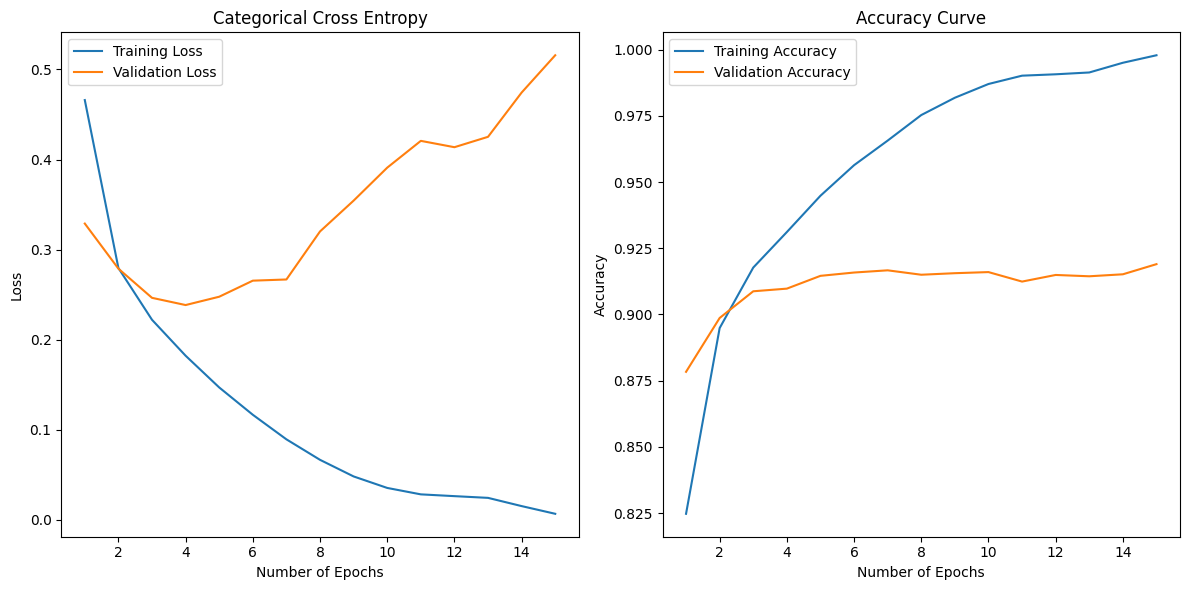

In [59]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the loss curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Categorical Cross Entropy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The validation accuracy saturates and loss increases after 5th epoch from above graph and if we train for more than 5 epochs it starts to overfit. To avoid this, we decrease the number of training epochs

###6.6 Final Model
Of all the models, CNN is observed to be performing well after hyperparameter tuning. Below is the final model.

In [60]:
'''def final_model():

  model = Sequential()
  model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))
  model.add(layers.Lambda(tf.nn.local_response_normalization))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(3, strides=2))
  model.add(layers.Conv2D(16*(2), 3 , padding='same' ))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(16*(3), 3 , padding='same' ))
  model.add(layers.Activation('relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  return model'''


"def final_model():\n\n  model = Sequential()\n  model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))\n  model.add(layers.Lambda(tf.nn.local_response_normalization))\n  model.add(layers.Activation('relu'))\n  model.add(layers.MaxPooling2D(3, strides=2))\n  model.add(layers.Conv2D(16*(2), 3 , padding='same' ))\n  model.add(layers.Activation('relu'))\n  model.add(layers.Conv2D(16*(3), 3 , padding='same' ))\n  model.add(layers.Activation('relu'))\n\n  model.add(layers.Flatten())\n  model.add(layers.Dense(400, activation='relu'))\n  model.add(layers.Dense(64, activation='relu'))\n  model.add(layers.Dense(10, activation='softmax'))\n\n  return model"

In [61]:
'''model = final_model()'''

'model = final_model()'

In [62]:
'''model.summary()'''

'model.summary()'

In [63]:
'''plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)'''

"plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)"